#### The objective of the project is to learn how to implement a simple image classification pipeline
based on a deep neural network. The goals of this project are as follows: 

● Understand the basic Image Classification pipeline and the data-driven approach
(train/predict stages)

● Data fetching and understand the train/test splits. (5 points)

● Implement and apply a deep neural network classifier including (15 points)

● Implement batch normalization for training the neural network (5 points)

● Print the classification accuracy metrics (10 points)


In [62]:
import h5py
import numpy as np

In [63]:
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

In [64]:
import keras
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape,BatchNormalization

#### Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
#### Data fetching and understand the train/test splits. 

In [65]:
df = h5py.File('SVHN_single_grey1.h5', 'r')

In [66]:
list(df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [67]:
#h5 dataset to numpy array
X_test = df['X_test'][:]
X_train = df['X_train'][:]
X_val = df['X_val'][:]
y_test = df['y_test'][:]
y_train =df['y_train'][:]
y_val = df['y_val'][:]

In [68]:

print("X_test shape..",X_test.shape)
print("X_train shape..",X_train.shape)
print("X_val shape..",X_val.shape)
print("y_test shape..",y_test.shape)
print("y_train shape..",y_train.shape)
print("y_val shape..",y_val.shape)

X_test shape.. (18000, 32, 32)
X_train shape.. (42000, 32, 32)
X_val shape.. (60000, 32, 32)
y_test shape.. (18000,)
y_train shape.. (42000,)
y_val shape.. (60000,)


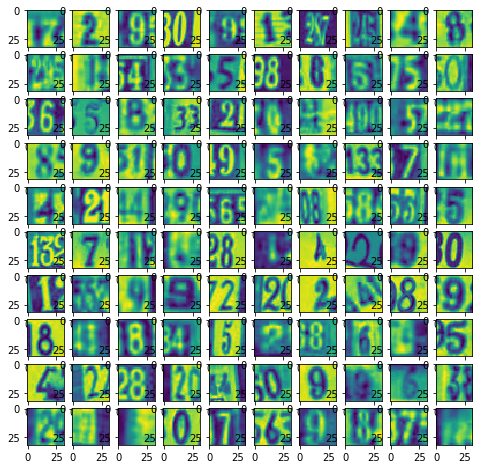

In [69]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [70]:
#numpy to 3D matrix

x_train2 = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
x_test2 = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')
x_val2 = X_val.reshape(X_val.shape[0], 32, 32, 1).astype('float32')
y_train2 = y_train.reshape(y_train.shape[0], 1).astype('float32')
y_test2 = y_test.reshape(y_test.shape[0],1).astype('float32')
y_val2 = y_val.reshape(y_val.shape[0],1).astype('float32')

In [71]:

print("X_test shape..",x_test2.shape)
print("X_train shape..",x_train2.shape)
print("X_val shape..",x_val2.shape)
print("y_test shape..",y_test2.shape)
print("y_train shape..",y_train2.shape)
print("y_val shape..",y_val2.shape)

X_test shape.. (18000, 32, 32, 1)
X_train shape.. (42000, 32, 32, 1)
X_val shape.. (60000, 32, 32, 1)
y_test shape.. (18000, 1)
y_train shape.. (42000, 1)
y_val shape.. (60000, 1)


##### Pre -processing 

In [72]:

#converting y to categorical
y_train2 = np_utils.to_categorical(y_train, 10)
y_test2 = np_utils.to_categorical(y_test, 10)

In [73]:
# normalizing the X
x_train3 = X_train/255
x_test3 = X_test/255

In [74]:

print(x_train3.shape)
print(y_train2.shape)

(42000, 32, 32)
(42000, 10)


In [75]:
#plot the images
def plot_images(img, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

d:\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


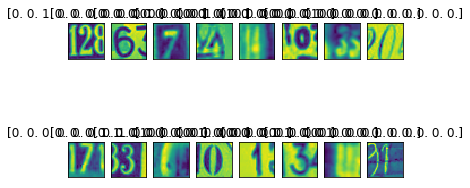

In [76]:
plot_images(x_train2, y_train2, 2, 8)

#### Implement and apply a deep neural network classifier

In [77]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [78]:
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

In [79]:
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 500)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 17us/sample - loss: 2.3145 - accuracy: 0.1038 - val_loss: 2.3032 - val_accuracy: 0.1077
Epoch 2/30
42000/42000 [==============================] - 0s 9us/sample - loss: 2.2997 - accuracy: 0.1156 - val_loss: 2.2980 - val_accuracy: 0.1169
Epoch 3/30
42000/42000 [==============================] - 0s 9us/sample - loss: 2.2945 - accuracy: 0.1268 - val_loss: 2.2934 - val_accuracy: 0.1366
Epoch 4/30
42000/42000 [==============================] - 0s 9us/sample - loss: 2.2898 - accuracy: 0.1367 - val_loss: 2.2882 - val_accuracy: 0.1394
Epoch 5/30
42000/42000 [==============================] - 0s 9us/sample - loss: 2.2845 - accuracy: 0.1497 - val_loss: 2.2831 - val_accuracy: 0.1498
Epoch 6/30
42000/42000 [==============================] - 0s 9us/sample - loss: 2.2788 - accuracy: 0.1594 - val_loss: 2.2773 - val_accuracy: 0.1643
Epoch 7/30
42000/42000 [==============================] - 0s 

##### Accuracy is quite low with sgd. Lets try adam as optimizer

In [80]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 500)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 19us/sample - loss: 2.2985 - accuracy: 0.1250 - val_loss: 2.2577 - val_accuracy: 0.1495
Epoch 2/30
42000/42000 [==============================] - 0s 9us/sample - loss: 2.1207 - accuracy: 0.2483 - val_loss: 1.9371 - val_accuracy: 0.3416
Epoch 3/30
42000/42000 [==============================] - 0s 9us/sample - loss: 1.7797 - accuracy: 0.4121 - val_loss: 1.6244 - val_accuracy: 0.4696
Epoch 4/30
42000/42000 [==============================] - 0s 9us/sample - loss: 1.4905 - accuracy: 0.5413 - val_loss: 1.3670 - val_accuracy: 0.5861
Epoch 5/30
42000/42000 [==============================] - 0s 9us/sample - loss: 1.3050 - accuracy: 0.6026 - val_loss: 1.2296 - val_accuracy: 0.6248
Epoch 6/30
42000/42000 [==============================] - 0s 9us/sample - loss: 1.2000 - accuracy: 0.6368 - val_loss: 1.1681 - val_accuracy: 0.6384
Epoch 7/30
42000/42000 [==============================] - 0s 

###### Accuracy has increased to 0.77.  adam optimizer is working better with this set

#### Implement batch normalization for training the neural network

In [81]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

# Adding batch normalization to the model 
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train3,y_train2,validation_data=(x_test3,y_test2),epochs=30,batch_size = 500)

Train on 42000 samples, validate on 18000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 27us/sample - loss: 1.6285 - accuracy: 0.4679 - val_loss: 1.6417 - val_accuracy: 0.6430
Epoch 2/30
42000/42000 [==============================] - 0s 11us/sample - loss: 0.9511 - accuracy: 0.7124 - val_loss: 1.1947 - val_accuracy: 0.7219
Epoch 3/30
42000/42000 [==============================] - 0s 10us/sample - loss: 0.7911 - accuracy: 0.7609 - val_loss: 0.9097 - val_accuracy: 0.7639
Epoch 4/30
42000/42000 [==============================] - 0s 10us/sample - loss: 0.6926 - accuracy: 0.7912 - val_loss: 0.7590 - val_accuracy: 0.7857
Epoch 5/30
42000/42000 [==============================] - 0s 10us/sample - loss: 0.6335 - accuracy: 0.8079 - val_loss: 0.6896 - val_accuracy: 0.8030
Epoch 6/30
42000/42000 [==============================] - 0s 10us/sample - loss: 0.5745 - accuracy: 0.8271 - val_loss: 0.6783 - val_accuracy: 0.8079
Epoch 7/30
42000/42000 [==============================] 

#### Using batch normalization has increased accuracy of model from 0.77 to o.84

In [82]:
loss_and_metrics = model.evaluate(x_test3,y_test2)
loss_and_metrics

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6609077258706093, 0.84055555]

#### Print the classification accuracy metrics

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred=model.predict(x_test3)
y_pred[0:5]

array([[1.2689275e-01, 3.3941934e-01, 1.1660273e-02, 7.9519320e-03,
        3.4007189e-01, 1.0799736e-01, 2.9432366e-02, 2.0541430e-02,
        4.0504006e-03, 1.1982317e-02],
       [1.5188576e-09, 7.4898416e-08, 3.5632303e-01, 1.5755217e-07,
        4.3204690e-11, 4.5676660e-07, 4.6647983e-08, 6.4363337e-01,
        9.8107478e-10, 4.2874770e-05],
       [4.4307677e-07, 6.0799344e-08, 9.9999189e-01, 1.7268397e-07,
        6.1451523e-08, 1.3867087e-10, 6.0394517e-10, 2.0812658e-06,
        2.7384531e-06, 2.5758429e-06],
       [4.9337604e-08, 3.8570923e-13, 5.3911248e-10, 3.6554923e-14,
        6.9642625e-12, 1.6599735e-15, 4.0849268e-13, 9.9373963e-18,
        3.6841882e-08, 1.0000000e+00],
       [9.9991417e-01, 6.0490371e-13, 6.4127387e-14, 1.2189523e-16,
        1.5689807e-11, 1.6162810e-14, 7.9895915e-05, 1.0456759e-13,
        2.6831145e-08, 5.8778187e-06]], dtype=float32)

In [43]:
matrix = confusion_matrix(y_test2.argmax(axis=1), y_pred.argmax(axis=1))
print("Confusion Matrix")
print(matrix)

# Get Classification Report
report = classification_report(np.argmax(y_test2, axis=1), np.argmax(y_pred, axis=1))
print(report)

Confusion Matrix
[[1591   24   12   23   23   11   35   17   27   51]
 [  25 1491   33   35   73   12   32   46   57   24]
 [  16   20 1549   41   30   12    8   42   41   44]
 [  14   22   33 1354   23  145   18   28   53   29]
 [  12   31   22   22 1633   13   34    7   17   21]
 [  20   12   13   67   13 1511   59    8   35   30]
 [  35   18    9   24   39  107 1503   10   67   20]
 [  19   55   48   23   18   14   11 1580   19   21]
 [  24   21   18   71   29   62   85   13 1438   51]
 [  66   31   25   35   22   59   21   16   52 1477]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1814
           1       0.86      0.82      0.84      1828
           2       0.88      0.86      0.87      1803
           3       0.80      0.79      0.79      1719
           4       0.86      0.90      0.88      1812
           5       0.78      0.85      0.81      1768
           6       0.83      0.82      0.83      1832
           7       

#### Comparison of model with and without batch normalization
#1. Batch normalization has reduced overfitting effect as difference between training acc and
   validation acc came down. 
#2. Batch normalization provided significant increase in performance. (0.77 vs 0.874)

#### We also observed that using adam optimizer algorithm in place of sgd did help increasing in accuracy from 0.47 to 0.77

#### Final loss of model is 0.6609077258706093 and accuracy is 0.84055555